In [113]:
# Required Libraries for Data Handling
import numpy as np
import pandas as pd

In [114]:
# Required Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Required Libraries for Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [116]:
# Required Libraries for Model Building
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

In [117]:
# Load and preprocess the dataset
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
X = data['text'].values
y = data['class'].values

In [118]:
# Encode the class labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=label_encoder.inverse_transform(y))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [120]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Tokenization and Vocabulary Creation
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [122]:
# Convert text data into sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [123]:
# Padding Sequences to a Uniform Length
max_sequence_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [124]:
# Build the LSTM model
embedding_size = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_size, input_length=max_sequence_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [125]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [126]:
# Train the model
epochs = 5
batch_size = 64
model_history = model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
63/63 [==============================] - 69s 1s/step - loss: 0.2400 - accuracy: 0.9230 - val_loss: 0.1062 - val_accuracy: 0.9641
Epoch 2/5
63/63 [==============================] - 54s 863ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0713 - val_accuracy: 0.9753
Epoch 3/5
63/63 [==============================] - 54s 865ms/step - loss: 0.0155 - accuracy: 0.9963 - val_loss: 0.0789 - val_accuracy: 0.9776
Epoch 4/5
63/63 [==============================] - 68s 1s/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0923 - val_accuracy: 0.9798
Epoch 5/5
63/63 [==============================] - 55s 881ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1126 - val_accuracy: 0.9753


In [131]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

35/35 [==============================] - 4s 102ms/step - loss: 0.0867 - accuracy: 0.9794
Test Loss: 0.08668457716703415
Test Accuracy: 0.9793722033500671


In [132]:
# Visualize model training history
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

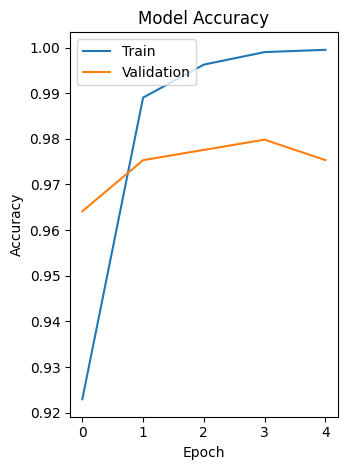

In [133]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

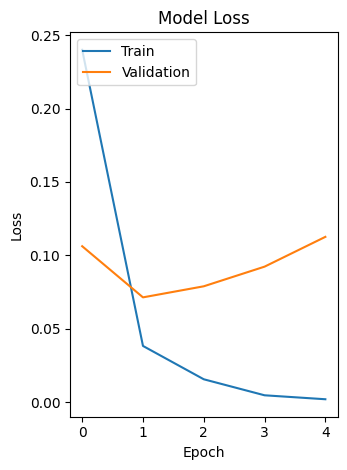

In [134]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()